- 最经典的点过程：泊松点过程（Poisson Point Process）
    - 在任意长度为 $T$ 的时间区间内，发生的事件数量 $N(T)$ 服从泊松分布，均值为 $\lambda T$
    - 城市的公交系统是一个完美的“泊松过程”，$\lambda = 0.1$ 辆/分钟（均值 $\lambda$ 是有单位的）

/data/hf/.cache/matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /tmp/matplotlib-uxo171x7 because there was an issue with the default path (/data/hf/.cache/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Simulated 23 events in 10.0 units of time.
Event times: [2.36 2.4  2.53 2.81 3.11 3.14 3.54 4.14 4.62 4.89 4.92 5.04 6.   6.79
 7.62 7.79 7.8  8.89 8.91 9.21 9.34 9.95 9.96]


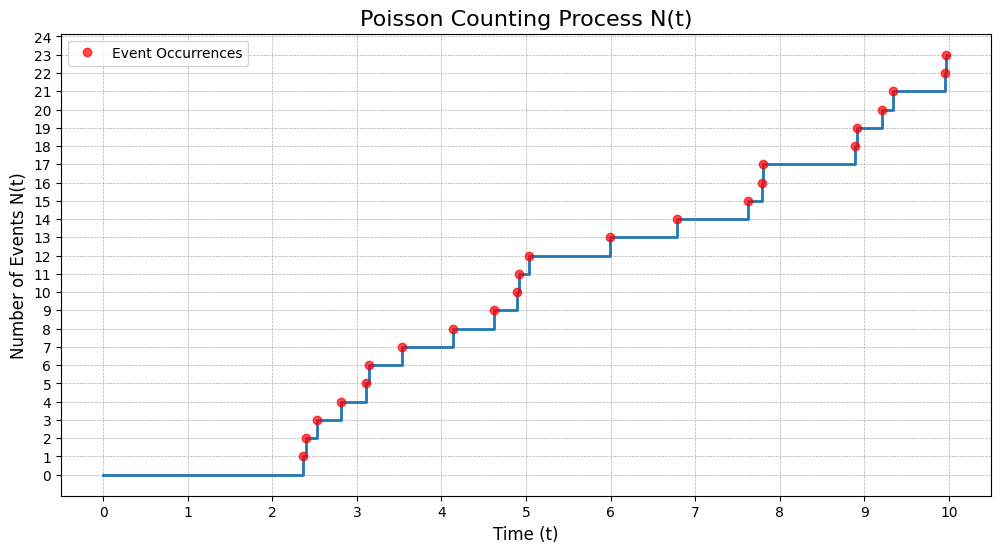

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_poisson_process(lambda_rate, time_duration):
    """
    Simulates a Poisson process.

    Args:
        lambda_rate (float): The average rate of events per unit of time.
        time_duration (float): The total duration of the simulation.

    Returns:
        numpy.ndarray: An array of event times.
    """
    # The number of events in a given duration is Poisson distributed.
    # We can simulate the number of events first.
    num_events = np.random.poisson(lambda_rate * time_duration)

    # Then, simulate the event times by drawing from a uniform distribution
    # over the interval [0, time_duration] and sorting them.
    # This is a property of homogeneous Poisson processes.
    event_times = np.sort(np.random.uniform(0, time_duration, num_events))
    
    return event_times

def plot_counting_process(event_times, time_duration):
    """
    Plots the counting process N(t) for a given set of event times.
    """
    # Create the steps for the plot
    # N(t) is the number of events up to time t
    if len(event_times) == 0:
        t_values = [0, time_duration]
        n_values = [0, 0]
    else:
        # The time points where the count changes
        t_values = np.concatenate(([0], event_times, [time_duration]))
        # The count value at each of those time points
        n_values = np.concatenate(([0], np.arange(1, len(event_times) + 1), [len(event_times)]))

    plt.figure(figsize=(12, 6))
    plt.step(t_values, n_values, where='post', lw=2)
    
    # Add points for each event
    plt.plot(event_times, np.arange(1, len(event_times) + 1), 'ro', alpha=0.7, label='Event Occurrences')

    plt.title('Poisson Counting Process N(t)', fontsize=16)
    plt.xlabel('Time (t)', fontsize=12)
    plt.ylabel('Number of Events N(t)', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(np.arange(0, time_duration + 1, time_duration / 10))
    plt.yticks(np.arange(0, len(event_times) + 2, 1))
    plt.legend()
    # plt.show()

# --- Simulation Parameters ---
LAMBDA_RATE = 2.0  # Average 2 events per unit of time
TIME_DURATION = 10.0 # Simulate for 10 units of time

# --- Run Simulation and Plot ---
events = simulate_poisson_process(LAMBDA_RATE, TIME_DURATION)
print(f"Simulated {len(events)} events in {TIME_DURATION} units of time.")
print("Event times:", np.round(events, 2))

plot_counting_process(events, TIME_DURATION)